In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import bean as be

In [84]:
plt.style.use('default')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 

In [3]:
h5ad_file_path="../../results/filtered_annotated/LDLvar/bean_count_LDLvar_alleleFiltered.h5ad"

In [4]:
ldlvar = be.read_h5ad(h5ad_file_path)


In [5]:
ldlvar.guides

,Unnamed: 0,target_variant,Target descriptor,Arbitrary number,gRNA position category,Target base position in gRNA,Target base position in reporter,BE,target_group,sequence,...,5-nt PAM,offset,target,spacer_target_pos,target_group2,masked_sequence,masked_barcode,edit_rate,genomic_pos,chr
name,,,,,,,,,,,,,,,,,,,,,
CONTROL_1_g1,0,CONTROL,NaN,1,g1,4,10,ABE,NegCtrl,CCTACGCGGTAGGGAACTTT,...,GGGAG,-10,CONTROL_1,9,NegCtrl,CCTGCGCGGTGGGGGGCTTT,GTTT,0.465013,NaN,NaN
CONTROL_1_g2,1,CONTROL,NaN,1,g2,5,11,ABE,NegCtrl,CCCTACGCGGTAGGGAACTT,...,TGGGA,-11,CONTROL_1,10,NegCtrl,CCCTGCGCGGTGGGGGGCTT,GGCG,0.810467,NaN,NaN
CONTROL_1_g3,2,CONTROL,NaN,1,g3,5,12,ABE,NegCtrl,CCCTACGCGGTAGGGAACT,...,TTGGG,-12,CONTROL_1,11,NegCtrl,CCCTGCGCGGTGGGGGGCT,CGCT,0.621639,NaN,NaN
CONTROL_1_g4,3,CONTROL,NaN,1,g4,7,13,ABE,NegCtrl,AGCCCTACGCGGTAGGGAAC,...,TTTGG,-13,CONTROL_1,12,NegCtrl,GGCCCTGCGCGGTGGGGGGC,TGGG,0.126516,NaN,NaN
CONTROL_1_g5,4,CONTROL,NaN,1,g5,8,14,ABE,NegCtrl,AAGCCCTACGCGGTAGGGAA,...,CTTTG,-14,CONTROL_1,13,NegCtrl,GGGCCCTGCGCGGTGGGGGG,GTGT,0.258330,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9987289_Maj_ABE_347_g1,3450,rs9987289,Maj,347,g1,3,10,ABE,Variant,GCATCAATATCACGTGGAA,...,CCAGC,-10,rs9987289_Maj_ABE_347,9,Variant,GCGTCGGTGTCGCGTGGGG,CGGT,0.127989,9183358.0,chr8
rs9987289_Maj_ABE_347_g2,3451,rs9987289,Maj,347,g2,4,11,ABE,Variant,GGCATCAATATCACGTGGA,...,ACCAG,-11,rs9987289_Maj_ABE_347,10,Variant,GGCGTCGGTGTCGCGTGGG,TCGC,0.306332,9183358.0,chr8
rs9987289_Maj_ABE_347_g3,3452,rs9987289,Maj,347,g3,6,12,ABE,Variant,TGGGCATCAATATCACGTGG,...,AACCA,-12,rs9987289_Maj_ABE_347,11,Variant,TGGGCGTCGGTGTCGCGTGG,GCGC,0.203854,9183358.0,chr8


In [6]:
ldlvar_variants_bulk = ldlvar[ldlvar.guides.target_group == "Variant", ldlvar.samples.bin == "bulk"]
ldlvar_variants_bulk

Genome Editing Screen comprised of n_guides x n_conditions = 2899 x 8
   guides:    'Unnamed: 0', 'target_variant', 'Target descriptor', 'Arbitrary number', 'gRNA position category', 'Target base position in gRNA', 'Target base position in reporter', 'BE', 'target_group', 'sequence', 'Reporter', 'barcode', '5-nt PAM', 'offset', 'target', 'spacer_target_pos', 'target_group2', 'masked_sequence', 'masked_barcode', 'edit_rate', 'genomic_pos', 'chr'
   samples:   'bin', 'rep', 'gini_X', 'median_corr_X', 'median_lfc_corr.top_bot', 'median_editing_rate', 'mask', 'lower_quantile', 'upper_quantile'
   samples_m: 
   samples_p: 
   layers:    'X_RPM', 'X_bcmatch', 'edit_rate', 'edits', 'lognorm_counts'
   uns:       'allele_counts', 'edit_counts', 'lfc', 'lfc_corr', 'repguide_mask', 'target_base_change', 'tiling'

In [7]:
ldlvar_variants_bulk.layers['edit_rate']

ArrayView([[       nan,        nan,        nan, ...,        nan,
            0.        , 0.        ],
           [       nan, 0.        , 0.        , ...,        nan,
            0.        , 0.        ],
           [0.        , 0.        , 0.        , ..., 0.        ,
            0.        , 0.        ],
           ...,
           [0.05865103, 0.01176471, 0.28571429, ..., 0.54545455,
            0.32075472, 0.19672131],
           [0.11842105, 0.25925926, 0.13636364, ..., 0.24271845,
            0.40740741, 0.26315789],
           [0.        , 0.        , 0.        , ...,        nan,
            0.07692308, 0.        ]])

In [8]:
edit_rates = ldlvar_variants_bulk.layers['edit_rate'].copy()
edit_rates[ldlvar_variants_bulk.layers['X_bcmatch'] < 10] = np.nan

In [9]:
editing_rates = pd.DataFrame(edit_rates, index=ldlvar_variants_bulk.guides.index, columns=ldlvar_variants_bulk.samples.index)
editing_rates['target'] = ldlvar_variants_bulk.guides.target

In [10]:
editing_rates

,rep5_bulk,rep9_bulk,rep10_bulk,rep11_bulk,rep12_bulk,rep13_bulk,rep14_bulk,rep15_bulk,target
name,,,,,,,,,
1:198994696TAT_Maj_ABE_1_g1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1:198994696TAT_Maj_ABE_1
1:198994696TAT_Maj_ABE_1_g2,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,1:198994696TAT_Maj_ABE_1
1:198994696TAT_Maj_ABE_1_g3,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1:198994696TAT_Maj_ABE_1
1:198994696TAT_Maj_ABE_1_g4,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1:198994696TAT_Maj_ABE_1
12:51779544AGA_Maj_ABE_2_g1,0.459330,0.374532,0.511834,0.548148,0.524138,0.562500,0.583333,0.480519,12:51779544AGA_Maj_ABE_2
...,...,...,...,...,...,...,...,...,...
rs9987289_Maj_ABE_347_g1,0.316456,0.275000,0.000000,0.000000,0.076923,NaN,0.000000,0.186047,rs9987289_Maj_ABE_347
rs9987289_Maj_ABE_347_g2,0.253425,0.379747,0.358268,0.054054,0.149425,0.609195,0.081395,0.238095,rs9987289_Maj_ABE_347
rs9987289_Maj_ABE_347_g3,0.058651,0.011765,0.285714,0.319277,0.038462,0.545455,0.320755,0.196721,rs9987289_Maj_ABE_347


In [11]:
max_editing_rates = editing_rates.groupby("target").max()
max_editing_rates_repmean = max_editing_rates.mean(axis=1)

In [25]:
editing_rates_repmean = editing_rates.iloc[:, :-1].mean(axis=1)

In [79]:
plt.style.use('jr')

In [66]:
editing_rates_repmean.dropna().mean()

0.34016922825011353

In [70]:
editing_rates_repmean.dropna().median()

0.30486895033635425

In [12]:
max_editing_rates

,rep5_bulk,rep9_bulk,rep10_bulk,rep11_bulk,rep12_bulk,rep13_bulk,rep14_bulk,rep15_bulk
target,,,,,,,,
1:198994696TAT_Maj_ABE_1,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
2:62866173TAT_Maj_ABE_12,0.607143,0.904762,1.000000,0.958333,0.983333,0.512821,0.171429,0.500000
2:118868389AAACA_Maj_ABE_8,0.000000,0.000000,0.042254,0.000000,NaN,0.933333,0.000000,0.000000
2:118873095TAACTCT_Maj_ABE_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2:164588224GAG_Maj_ABE_10,0.015385,0.526316,0.478261,1.000000,NaN,0.000000,NaN,0.700000
...,...,...,...,...,...,...,...,...
rs551641295_Maj_ABE_230,0.457447,0.156069,0.362963,0.490566,0.267442,0.239130,0.290323,0.322581
rs569255498_Maj_ABE_236,0.907407,0.486486,0.835443,0.257576,0.833333,0.458333,0.466667,0.642857
rs573638413_Maj_ABE_239,0.237443,0.240000,0.091892,0.517241,0.500000,0.520000,1.000000,0.571429


In [13]:
len(max_editing_rates)

583

In [75]:
plt.style.use('default')

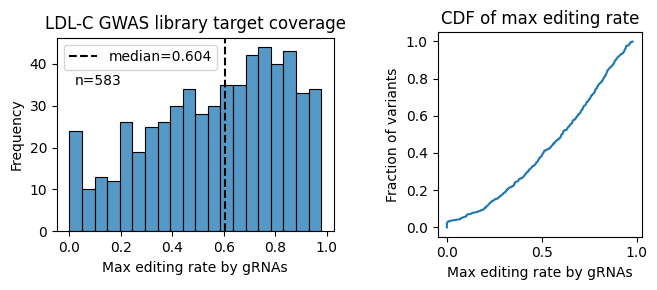

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.histplot(max_editing_rates_repmean, bins=20, ax=ax[0])
ax[0].text(0.02,35, f"n={len(max_editing_rates_repmean)}")
ax[0].axvline(np.nanmedian(max_editing_rates_repmean), c='black', linestyle='--', label=f"median={np.nanmedian(max_editing_rates_repmean):.3f}")
ax[0].legend()
ax[0].set_xlabel("Max editing rate by gRNAs")
ax[0].set_ylabel("Frequency")
ax[0].set_title("LDL-C GWAS library target coverage")
ax[0].set_box_aspect(0.7)
ax[1].plot(np.sort(max_editing_rates_repmean), np.linspace(0, 1, len(max_editing_rates_repmean), endpoint=False))
ax[1].set_ylabel("Fraction of variants")
ax[1].set_xlabel("Max editing rate by gRNAs")
ax[1].set_title("CDF of max editing rate")
ax[1].set_box_aspect(1)
plt.tight_layout()
fig.savefig("b_variant_targeting_rate_v2.pdf", bbox_inches='tight')

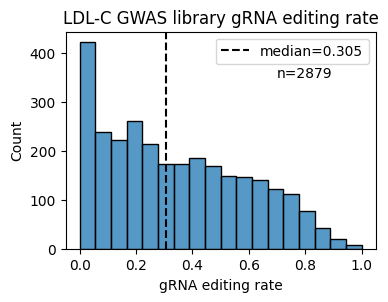

In [90]:
fig, ax = plt.subplots(figsize=(4,3))
sns.histplot(editing_rates_repmean.dropna())
ax.set_title("LDL-C GWAS library gRNA editing rate")
ax.set_box_aspect(0.7)
ax.set_xlabel("gRNA editing rate")

#sns.histplot(editing_rates_repmean.dropna(), ax= ax)
ax.axvline(editing_rates_repmean.dropna().median(), c = "black", linestyle='--', label=f"median={editing_rates_repmean.dropna().median():.3f}")
ax.text(0.7, 350, f"n={len(editing_rates_repmean.dropna())}")
ax.legend()
fig.savefig("b_guide_editing_rate_v2.pdf", bbox_inches='tight')

In [63]:
len(editing_rates_repmean.dropna())

2879

In [64]:
np.nanmedian(max_editing_rates_repmean)

0.6044881210642081

In [65]:
np.nanmean(max_editing_rates_repmean)

0.567236966076143